In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

import os


In [94]:
list_files = os.listdir('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data')

In [95]:
list_files

['CSVbigdataengineer.csv',
 'CSVML.csv',
 'CSVstatisticalAnalyst.csv',
 'CSVresearcher.csv',
 'CSVdataAnalyst.csv',
 'CSVFILE.csv']

In [96]:
data_analyst = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVdataAnalyst.csv', encoding='cp1252')
data_scientist = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVFILE.csv', encoding='cp1252')
data_ml = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVML.csv', encoding='cp1252')
data_statisticalAnalyst = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVstatisticalAnalyst.csv', encoding='cp1252')
data_researcher = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVresearcher.csv', encoding='cp1252')
data_bigdata = pd.read_csv('/Users/meskara/Desktop/Github/Job_Market/src/Notebook/Data/CSVbigdataengineer.csv', encoding='cp1252')

In [97]:
df = pd.concat([data_analyst, data_scientist, data_ml, data_researcher, data_bigdata, data_statisticalAnalyst])
df_new = df.drop_duplicates().sort_index()

In [98]:
df_new

,job_id,title,comapany,date,location,place,job_function,employment_type,industries,description
0,2801690476,Data Analyst,Webmasters4SEO,2021-11-20,United States,United States,NaN,Full-time,NaN,What you’ll do\nThe business analyst would wor...
0,2803917600,Entry Level Big Data Engineer,Comcast,2021-10-28,United States,"West Chester, PA",Engineering and Information Technology,Full-time,"IT Services and IT Consulting, Internet Publis...",Comcast brings together the best in media and ...
0,2799459539,"Researcher, The Row",CNN,2021-11-19,United States,"Atlanta, GA","Research, Analyst, and Information Technology",Full-time,Broadcast Media Production and Distribution,Company Overview\n\nWarnerMedia is a powerful ...
0,2807317112,Machine Learning Engineer,Domino's,2021-11-21,United States,"Ann Arbor, MI",NaN,Full-time,NaN,Help Domino's Data Science Center of Excellenc...
0,2800158106,Data Scientist,The Home Depot,2021-11-19,United States,"Atlanta, GA",NaN,Full-time,NaN,"Data scientist, Space Optimization link:\n\nht..."
...,...,...,...,...,...,...,...,...,...,...
963,2800910074,Senior Data Scientist - Machine Learning [Remote],HiRoad,2021-11-19,United States,"Conway, SC",Engineering and Information Technology,Full-time,Insurance,Our Mission\n\nWe make good things happen by r...
964,2800907510,Senior Data Scientist - Machine Learning [Remote],HiRoad,2021-11-19,United States,"North Myrtle Beach, SC",Engineering and Information Technology,Full-time,Insurance,Our Mission\n\nWe make good things happen by r...
965,2800907639,Senior Data Scientist - Machine Learning [Remote],HiRoad,2021-11-19,United States,"New Orleans, LA",Engineering and Information Technology,Full-time,Insurance,Our Mission\n\nWe make good things happen by r...
966,2807221058,Data Scientist Intern – IBM Garage - Summit Su...,IBM,2021-11-20,United States,"New York, NY",Sales,Full-time,Computer Hardware Manufacturing,Introduction\n\nDo you want to use your new te...


In [99]:
for col in df.columns:
    
   df_new[col] = df_new[col].str.lower()

In [100]:
skills = ['python', ' r ', 'numpy', 'pandas', 'impala', 'unix', 'pig', 'hbase',
          'scikit-learn', 'java', 'seaborn', 'pyspark', 'kafka', 'postgres',
          ' c ', 'c++', 'hadoop', 'spark', 'sql', 'spreadsheets', 'matlab',
          'nosql', 'mongodb', 'scala', 'sas', 'html', 'css', 'javascript',
          'powerpoint', 'aws', 'azure', 'gcp', 'tableau', 'cassandra', 'excel ',
          'mysql', 'linux', 'hive', 'perl', 'tensorflow', 'pytorch', 'keras']

def executionSkill(x):

    skill_array = []

    for skill in skills:

        if skill.lower() in x.lower():

            skill_array.append(skill)
            
    if skill_array==[]: skill_array.append('no requirement specified')
    
    return skill_array

df_new['skills'] = df_new['description'].apply(lambda x: executionSkill(x))

education = ['bachelor', 'master', 'ms', 'm.s', 'bs', 'b.s', 'phd', 'ph.d', 'doctorate', 'postgraduate']

def executionEducation(x):

    edu_array = []

    for edu in education:

        if edu.lower() in x.lower():

            edu_array.append(edu)
            
    if edu_array==[]: edu_array.append('no requirement specified')
    
    return edu_array

df_new['education'] = df_new['description'].apply(lambda x: executionEducation(x))

concepts = [
    'statistics', 'data visualization', 'cloud computing', 'distributed system',
    'ml', 'machine learning', 'ai', 'artificial intelligence',
    'communication skills', 'mathematics', 'maths', 'critical thinking',
    'data warehousing', 'problem solving', 'research', 'project management',
    'bi', 'business intelligence', 'etl', 'preprocessing', 'feature engineering',
    'data manipulation', 'probability', 'neural network', 'computer vision',
    'deep learning', 'data mining', 'big data'
]

def executionConcept(x):

    concept_array = []

    for con in concepts:

        if con.lower() in x.lower():

            concept_array.append(con)
            
    if concept_array==[]: concept_array.append('no requirement specified')
    
    return concept_array

df_new['concepts'] = df_new['description'].apply(lambda x: executionConcept(x))

majors = [
    'computer science', 'computer engineering', 'mathematics', 'maths', 'statistics',
    'data science', 'datascience', 'engineering', 'machine learning',
    'computer vision', 'electrical engineering', 'ee', 'applied math', 'finance'
]

def executionMajors(x):

    Major_array = []

    for maj in majors:

        if maj.lower() in x.lower():

            Major_array.append(maj)
            
    if Major_array==[]: Major_array.append('no requirement specified')
    
    return Major_array

df_new['majors'] = df_new['description'].apply(lambda x: executionMajors(x))


In [101]:
df_new.drop('description', axis= 1)

,job_id,title,comapany,date,location,place,job_function,employment_type,industries,skills,education,concepts,majors
0,2801690476,data analyst,webmasters4seo,2021-11-20,united states,united states,NaN,full-time,NaN,[no requirement specified],[ms],"[ai, bi, business intelligence]",[ee]
0,NaN,entry level big data engineer,comcast,2021-10-28,united states,"west chester, pa",engineering and information technology,full-time,"it services and it consulting, internet publis...","[python, unix, hadoop, spark, sql, scala, aws,...","[bachelor, ms]","[cloud computing, ml, ai, research, bi]","[engineering, ee]"
0,NaN,"researcher, the row",cnn,2021-11-19,united states,"atlanta, ga","research, analyst, and information technology",full-time,broadcast media production and distribution,[no requirement specified],[bs],"[ai, research, bi]",[ee]
0,NaN,machine learning engineer,domino's,2021-11-21,united states,"ann arbor, mi",NaN,full-time,NaN,[no requirement specified],[no requirement specified],[machine learning],"[data science, machine learning]"
0,NaN,data scientist,the home depot,2021-11-19,united states,"atlanta, ga",NaN,full-time,NaN,[no requirement specified],[no requirement specified],[ml],[ee]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"conway, sc",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[ms, bs]","[machine learning, ai, research, bi]","[data science, engineering, machine learning, ee]"
964,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"north myrtle beach, sc",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[ms, bs]","[machine learning, ai, research, bi]","[data science, engineering, machine learning, ee]"
965,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"new orleans, la",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[ms, bs]","[machine learning, ai, research, bi]","[data science, engineering, machine learning, ee]"
966,NaN,data scientist intern – ibm garage - summit su...,ibm,2021-11-20,united states,"new york, ny",sales,full-time,computer hardware manufacturing,"[python, pandas, scikit-learn, spark, linux]","[bachelor, master, ms]","[statistics, data visualization, ml, machine l...","[computer science, statistics, data science, e..."


In [ ]:
skill_array = []

text = ''

for skills in df_new['skills']:

    for skill in skills:

        if skill == 'no requirement specified':

            continue

        skill_array.append(skill.strip())
        
text += ' '.join(skill_array) + ' '

In [103]:
text

'python unix hadoop spark sql scala aws hive sas scala aws python unix aws linux sql excel postgres sql spreadsheets sas powerpoint mysql python java c++ aws azure gcp tensorflow pytorch python java matlab scala sas aws azure tensorflow hadoop sql scala excel mysql python matlab python java matlab scala sas aws azure tensorflow python c++ tensorflow pytorch python pig hbase java kafka hadoop spark sql nosql mongodb scala aws azure mysql hive python c++ tensorflow pytorch r powerpoint tableau excel python sql tableau python java kafka spark sql javascript perl r excel sql aws excel r python java scala aws python r java scala sas sas python c++ tensorflow pytorch r sql mysql python spark sql scala tensorflow pytorch python java c++ hadoop spark sql scala tableau cassandra sql sas tableau java sql html css javascript powerpoint tableau python pyspark spark aws python r sas excel r excel python numpy scikit-learn spark sql nosql scala pytorch python sql matlab r sql r python java kafka spa

(-0.5, 499.5, 499.5, -0.5)

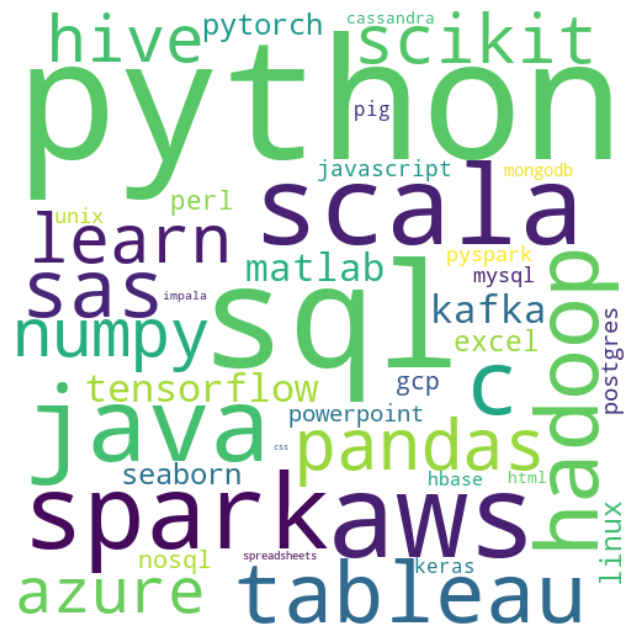

In [104]:
from PIL import Image

mask = np.array(Image.open("/Users/meskara/Desktop/Github/Job_Market/Linkedin.png"))

plt.figure(figsize=(8, 8), facecolor= None)
from wordcloud import WordCloud

wc = WordCloud(background_color = 'White', max_font_size = 256, 
               random_state = 42, width = 500, height = 500, 
               collocations = False, max_words = 2000).generate(text)

plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')

In [105]:
dic = {}

for skills in df_new['skills']:

    for skill in skills:

        dic[skill] = dic.get(skill, 0) + 1

label = list(dic.keys())
counts = list(dic.values())

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

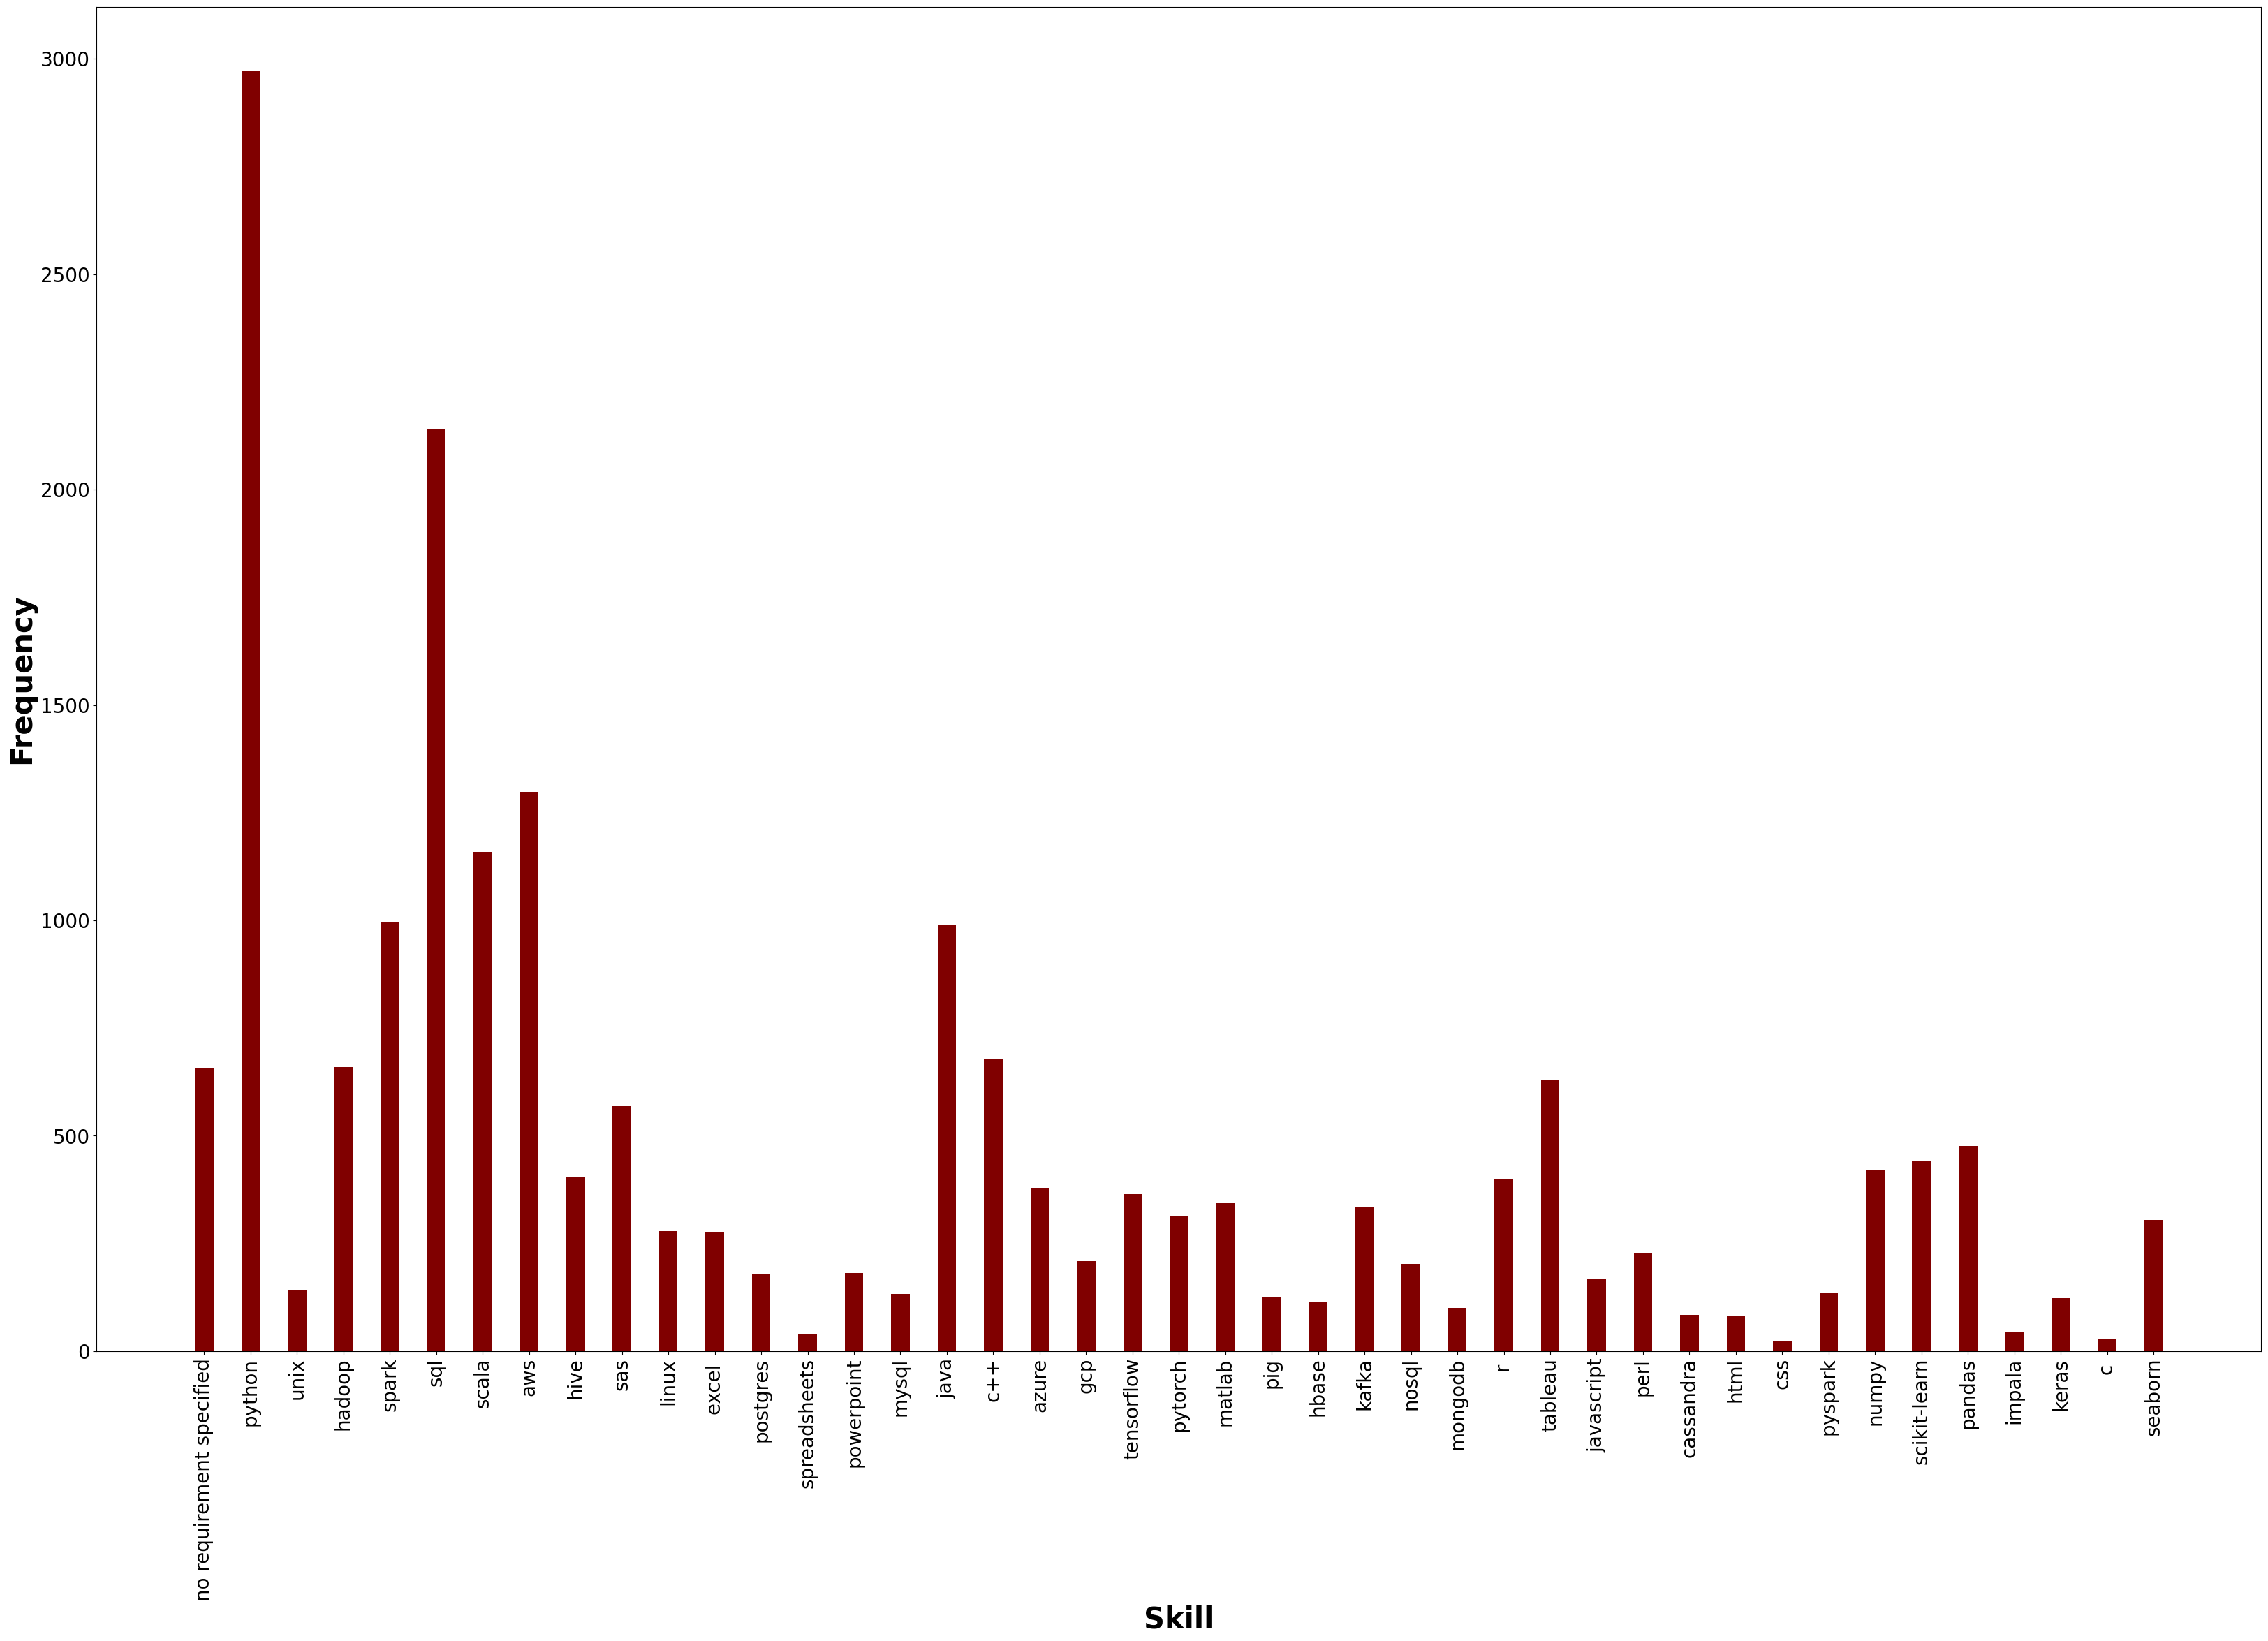

In [106]:
plt.figure(figsize=(40, 25))

plt.bar(label, counts, color = 'maroon', width= 0.4)

plt.xlabel('Skill', fontweight = 'bold', fontsize =30)
plt.ylabel('Frequency', fontweight = 'bold', fontsize = 30)
plt.xticks(fontsize = 20, rotation = 'vertical')
plt.yticks(fontsize = 20)
